In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Dataset
dataset = pd.read_csv('mediacompany.csv')

In [5]:
# Taking a look at data
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [10]:
# Dropping unnanmed coloumn 
dataset = dataset.drop('Unnamed: 7',axis=1)

In [11]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [13]:
# Converting date to pandas datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [15]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [80]:
# Deriving Date since the show started
from datetime import date

d0 = pd.Series(date(2017,2,28))
d1 = dataset.Date
delta = d1 - d0[0]
dataset['day'] = delta

In [78]:
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [87]:
# Cleaning days
#dataset['day'] = dataset['day'].astype(str)
dataset['day'] = dataset['day'].map(lambda x: x[0:2])
dataset.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


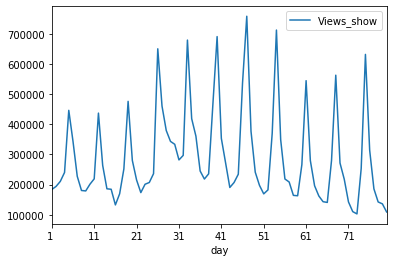

In [88]:
# days vs views_show
dataset.plot.line(x='day',y='Views_show')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


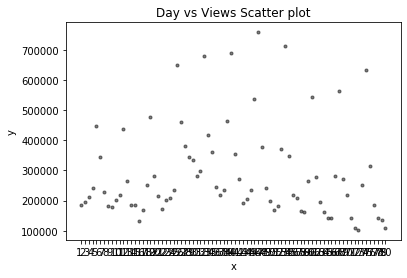

In [93]:
# Scatter plot (days as views-show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(dataset.day,dataset.Views_show,s=area,c=colors,alpha=0.5)
plt.title('Day vs Views Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

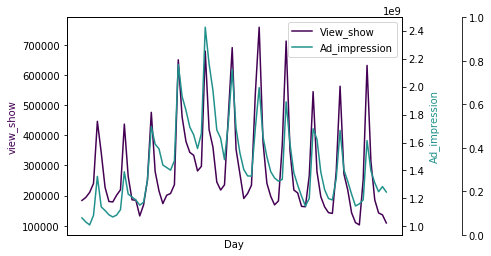

In [98]:
# Plot for days vs views_show and days vs Ad_impressions
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("view_show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(dataset.day,dataset.Views_show,color=color1,label="View_show")
p2, = par1.plot(dataset.day,dataset.Ad_impression,color=color2,label="Ad_impression")

lns = [p1,p2]
host.legend(handles=lns,loc='best')

# right,left,top,bottom
par2.spines['right'].set_position(('outward',60))

# no x-ticks
par2.xaxis.set_ticks([])
# sometimes handy, same for xaxis
# par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("PyPlot_multiplle_y_axis.png",bbox_inches='tight')

In [109]:
# Derived Matrices
# Weekdays are taken such that 1 corresponds to Sunday and 7 sorresponds to Saturday
# Generate weekday variable



dataset['weekday'] = (dataset['day']+3)%7
dataset.weekday.replace(0,7,inplace=True)
dataset['weekday'] = dataset['weekday'].astype(int)
dataset.head()

TypeError: can only concatenate str (not "int") to str